# Step 6: 2-D Convection

Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:

$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = 0
$$

$$
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = 0
$$

Discretizing these equations using the methods we've applied previously yields:

$$
\frac{u_{ij}^{n+1} - u_{ij}^n}{\Delta t} + u_{ij}^n\frac{u_{ij}^n - u_{i-1j}^n}{\Delta x} + v_{ij}^n\frac{u_{ij}^n - u_{ij-1}^n}{\Delta y} = 0
$$

$$
\frac{v_{ij}^{n+1} - v_{ij}^n}{\Delta t} + u_{ij}^n\frac{v_{ij}^n - v_{i-1j}^n}{\Delta x} + v_{ij}^n\frac{v_{ij}^n - v_{ij-1}^n}{\Delta y} = 0
$$

Rearranging both equations, we solve for $u_{ij}^{n+1}$ and $v_{ij}^{n+1}$, respectively. Note that these equations are also coupled.

$$
u_{ij}^{n+1} = u_{ij}^{n} - u_{ij}^n\frac{\Delta t}{\Delta x}(u_{ij}^n - u_{i-1j}^n) - u_{ij}^n\frac{\Delta t}{\Delta y}(u_{ij}^n - u_{ij-1}^n)
$$

$$
v_{ij}^{n+1} = v_{ij}^{n} - u_{ij}^n\frac{\Delta t}{\Delta x}(v_{ij}^n - v_{i-1j}^n) - v_{ij}^n\frac{\Delta t}{\Delta y}(v_{ij}^n - v_{ij-1}^n)
$$

## Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions

$$
u, v = 
    \begin{cases}
        2 &\text{ for } x, y \in (0.5,1) \times (0.5, 1) \\
        1 &\text{ everywhere else}
    \end{cases}
$$

## Boundary Conditions

The boundary conditions hold $u$ and $v$ equal to 1 along the boundaries of the grid.

$$
u = 1, v = 1 \text{ for}
    \begin{cases}
        x = 0, 2\\
        y = 0, 2
    \end{cases}
$$

## Analysis

In [1]:
# -------
# Imports
# -------

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy as np
%matplotlib inline


# ---------
# Variables
# ---------

nx = 101
ny = 101
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
nt = 80
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

# -----------------
# Initial Condition
# -----------------
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

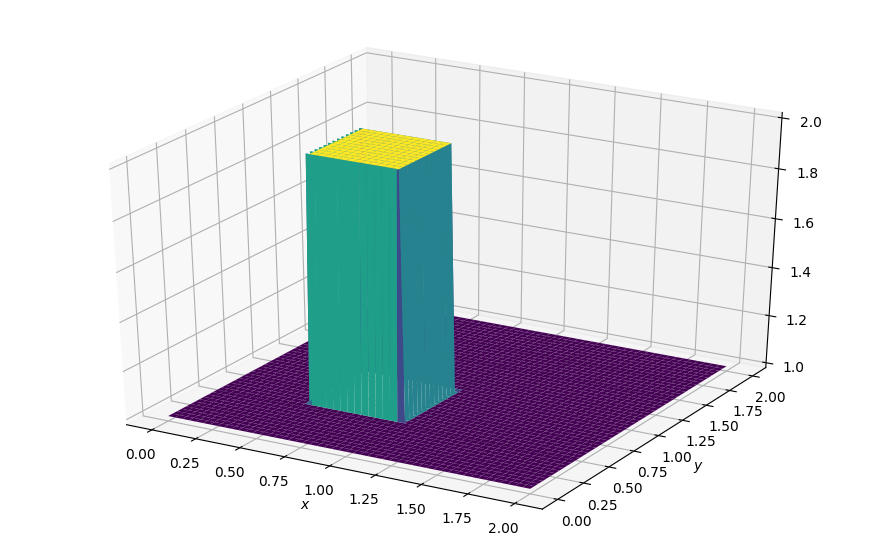

In [2]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [3]:
for n in range(nt + 1):
    un = np.copy(u)
    vn = np.copy(v)
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

NameError: name 'c' is not defined